In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
%matplotlib inline


In [134]:
ds = pd.read_csv(r'C:\Users\BHAVIKKSVSS\Desktop\train.csv')



ds=ds.iloc[:,1:]

ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [135]:
ds.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [136]:
ds.isnull().sum() 

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [137]:
enc=LabelEncoder()
ds.iloc[:,16]=enc.fit_transform(ds.iloc[:,16])


In [138]:
feature_cols=['MSSubClass','LotArea','OverallQual','GarageCars','1stFlrSF','OverallCond','FullBath','TotRmsAbvGrd','TotalBsmtSF','GarageArea','YrSold']
x = ds[feature_cols] # predictor
y = ds['SalePrice'] # response

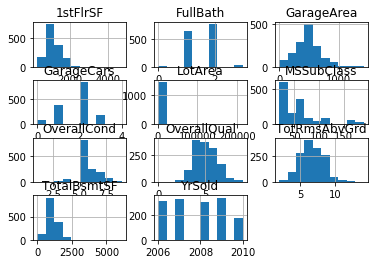

In [139]:
x.hist()
plt.show()

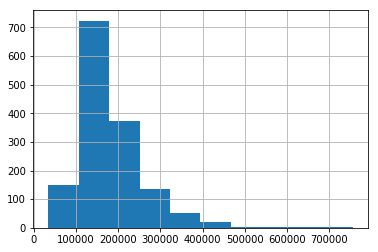

In [140]:
y.hist()
plt.show()

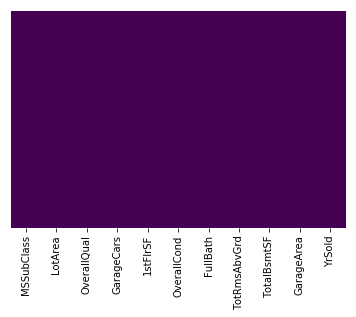

In [141]:
#x=ds.dropna(axis='rows')
sns.heatmap(x.isnull(),cbar = False,cmap = 'viridis',yticklabels = False)


In [142]:
x=pd.get_dummies(x,drop_first=True)

In [143]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(x)
print(x)

      MSSubClass  LotArea  OverallQual  GarageCars  1stFlrSF  OverallCond  \
0             60     8450            6           2       856            5   
1             20     9600            5           2      1262            8   
2             60    11250            6           2       920            5   
3             70     9550            6           3       961            5   
4             60    14260            7           3      1145            5   
5             50    14115            4           2       796            5   
6             20    10084            7           2      1694            5   
7             60    10382            6           2      1107            6   
8             50     6120            6           2      1022            5   
9            190     7420            4           1      1077            6   
10            20    11200            4           1      1040            5   
11            60    11924            8           3      1182            5   

In [144]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2) 




In [145]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:

print(linreg.score(x_test, y_test)*100,'% Prediction Accuracy')

81.31972573859096 % Prediction Accuracy
